In [46]:
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

from sklearn import datasets, preprocessing
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = "../datasets/data/train"
validation_data_dir = "../datasets/data/validation"

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=64,
        color_mode="grayscale",
        class_mode="categorical")

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=64,
        color_mode="grayscale",
        class_mode="categorical")

Found 257140 images belonging to 10 classes.
Found 2600 images belonging to 10 classes.


In [47]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
nb_epoch = 300
nb_train_samples = 2048
nb_validation_samples = 832

In [ ]:
history = model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

Epoch 1/300
2048/2048 [==============================] - 13s - loss: 0.4733 - acc: 0.8062 - val_loss: 0.3308 - val_acc: 0.9000
Epoch 2/300
2048/2048 [==============================] - 13s - loss: 0.3765 - acc: 0.8884 - val_loss: 0.3329 - val_acc: 0.9000
Epoch 3/300
2048/2048 [==============================] - 13s - loss: 0.3564 - acc: 0.8953 - val_loss: 0.3154 - val_acc: 0.9000
Epoch 4/300
2048/2048 [==============================] - 13s - loss: 0.3380 - acc: 0.9006 - val_loss: 0.2956 - val_acc: 0.9065
Epoch 5/300
2048/2048 [==============================] - 13s - loss: 0.3192 - acc: 0.9038 - val_loss: 0.2766 - val_acc: 0.9096
Epoch 6/300
2048/2048 [==============================] - 13s - loss: 0.3063 - acc: 0.9046 - val_loss: 0.2622 - val_acc: 0.9115
Epoch 7/300
2048/2048 [==============================] - 11s - loss: 0.2888 - acc: 0.9069 - val_loss: 0.2560 - val_acc: 0.9094
Epoch 8/300
2048/2048 [==============================] - 14s - loss: 0.2742 - acc: 0.9099 - val_loss: 0.2484 - 

/home/mitake/lda/jawiki/local/lib/python2.7/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


2100/2048 [==============================] - 13s - loss: 0.1197 - acc: 0.9459 - val_loss: 0.1083 - val_acc: 0.9512
Epoch 127/300
2048/2048 [==============================] - 14s - loss: 0.1280 - acc: 0.9448 - val_loss: 0.1064 - val_acc: 0.9490
Epoch 128/300
2048/2048 [==============================] - 13s - loss: 0.1358 - acc: 0.9413 - val_loss: 0.1240 - val_acc: 0.9454
Epoch 129/300
2048/2048 [==============================] - 14s - loss: 0.1278 - acc: 0.9418 - val_loss: 0.1043 - val_acc: 0.9501
Epoch 130/300
2048/2048 [==============================] - 13s - loss: 0.1161 - acc: 0.9466 - val_loss: 0.0996 - val_acc: 0.9516
Epoch 131/300
2048/2048 [==============================] - 12s - loss: 0.1416 - acc: 0.9387 - val_loss: 0.1101 - val_acc: 0.9477
Epoch 132/300
2048/2048 [==============================] - 13s - loss: 0.1468 - acc: 0.9382 - val_loss: 0.1054 - val_acc: 0.9476
Epoch 133/300
2048/2048 [==============================] - 15s - loss: 0.1214 - acc: 0.9452 - val_loss: 0.0990 

In [ ]:
model.save_weights('e300.h5')

In [ ]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.068484609230206564, 0.9645432738157419]

In [45]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_5 (Convolution2D)  (None, 62, 62, 32)    320         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 62, 62, 32)    0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 31, 31, 32)    0           activation_7[0][0]               
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 29, 29, 32)    9248        maxpooling2d_5[0][0]             
___________________________________________________________________________________________

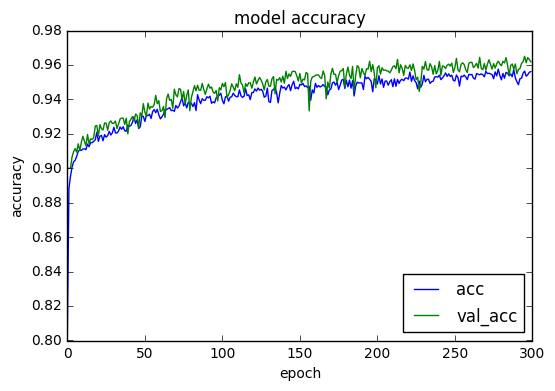

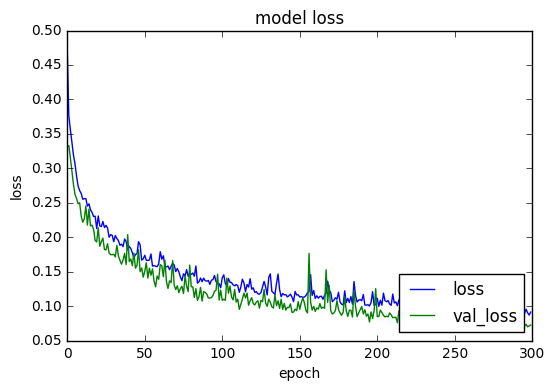

In [ ]:
# http://aidiary.hatenablog.com/entry/20161109/1478696865
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)

<Container object of 10 artists>

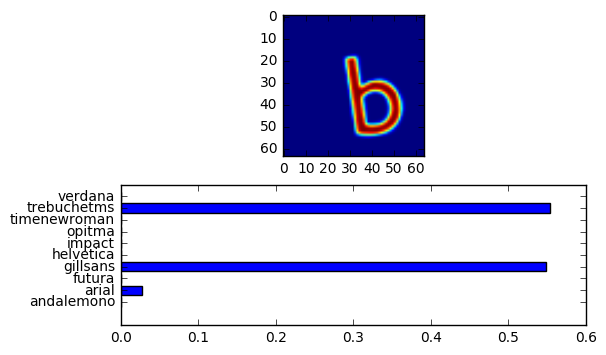

In [85]:
# predict
from keras.preprocessing import image
fonts = ["andalemono", "arial", "futura", "gillsans", "helvetica", "impact", "opitma", "timenewroman", "trebuchetms", "verdana"]
lefts = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 学習済みの重みをロード
model.load_weights('e300.h5')
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

filename = "../datasets/data/validation/andalemono/a-0911.png"
filename = "../datasets/data/validation/gillsans/o-0911.png"
filename = "../datasets/data/validation/gillsans/b-0917.png"

img = image.load_img(filename, target_size=(img_height, img_width), grayscale=True)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x = x / 255.0

pred = model.predict(x)[0]
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.subplot(2, 1, 2)
plt.barh(lefts, pred, tick_label=fonts, align="center")

In [69]:
def predict(imagepath):
    fonts = ["andalemono", "arial", "futura", "gillsans", "helvetica", "impact", "opitma", "timenewroman", "trebuchetms", "verdana"]
    img = image.load_img(imagepath, target_size=(img_height, img_width), grayscale=True)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    x = x / 255.0

    pred = model.predict(x)[0]
    pred_index = np.argmax(pred)
    return pred_index, fonts[pred_index]

In [90]:
data = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

acc = [[], [], [], [], [], [], [], [], [], []]
incre = 1.0 / 260.0

for font in fonts:
    font_index = fonts.index(font)
    acc[font_index] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    for d in data:
        for i in xrange(10):
            file = "../datasets/data/validation/" + font + "/" + d + "-091" + str(i) + ".png"
            pred = predict(file)
            acc[font_index][pred[0]] += incre
#             if pred[1] != font:
#                 print file, pred

print acc

[[0.9730769230769201, 0.0, 0.0, 0.0, 0.019230769230769232, 0.0, 0.0, 0.0, 0.0, 0.007692307692307693], [0.0, 0.5730769230769215, 0.0, 0.03461538461538462, 0.0, 0.0, 0.0, 0.0, 0.35769230769230687, 0.03461538461538462], [0.0, 0.0, 0.9884615384615354, 0.011538461538461539, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.015384615384615385, 0.0, 0.8576923076923051, 0.0, 0.0, 0.0, 0.0, 0.10384615384615385, 0.023076923076923078], [0.03461538461538462, 0.04230769230769231, 0.0, 0.023076923076923078, 0.10384615384615385, 0.0, 0.0, 0.0, 0.0, 0.7961538461538438], [0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999999999969, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999999999969, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0038461538461538464, 0.0, 0.0, 0.0, 0.9923076923076892, 0.0, 0.0038461538461538464], [0.0, 0.10384615384615385, 0.007692307692307693, 0.04230769230769231, 0.0, 0.0, 0.0, 0.0, 0.8153846153846129, 0.03076923076923077], [0.0, 0.11923076923076924, 0.0, 0.0, 0.023076923076923078, 0.0, 0.0, 0.0, 0.02692

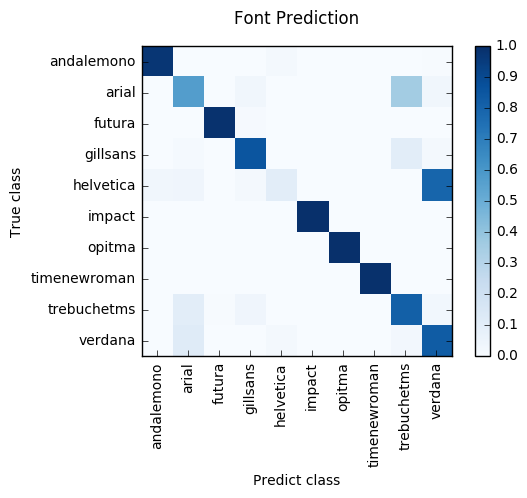

In [101]:
from matplotlib.pyplot import specgram
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.utils import resample
from matplotlib import pylab
import numpy as np

cm = acc
name_list = ["andalemono", "arial", "futura", "gillsans", "helvetica", "impact", "opitma", "timenewroman", "trebuchetms", "verdana"]
title = "Font Prediction"

pylab.clf()
pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=1)
ax = pylab.axes()
ax.set_xticks(range(len(name_list)))
ax.set_xticklabels(name_list, rotation=90)
ax.xaxis.set_ticks_position("bottom")
ax.set_yticks(range(len(name_list)))
ax.set_yticklabels(name_list)
# ax.yaxis.ticks(rotation=70)

pylab.title(title)
pylab.colorbar()
pylab.grid(False)
pylab.xlabel('Predict class')
pylab.ylabel('True class')
pylab.grid(False)
pylab.show()